In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,53.394982,1.892940,10.248586,8.144072,19.823457
1,59.361052,0.197938,8.559380,-3.356286,20.710954
2,58.604829,9.718193,7.720400,-2.634691,19.311045
3,58.459126,1.932953,9.004993,-6.507025,23.459870
4,50.626328,12.911178,11.295614,10.996670,16.262913


<AxesSubplot:ylabel='Density'>

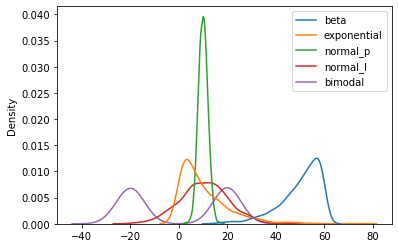

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.227967,10.391566,10.027546,10.430394,-0.014266
std,8.450789,10.260420,1.950905,9.737108,20.166411
min,16.104644,0.035442,2.728657,-19.689309,-28.744088
25%,45.756608,2.922052,8.717953,4.219911,-19.910318
50%,52.562209,7.281240,10.019975,10.528624,0.159476
75%,56.767477,14.805821,11.311303,17.014212,19.905373
max,59.995435,73.755139,17.220406,43.705547,31.275594


<AxesSubplot:ylabel='Density'>

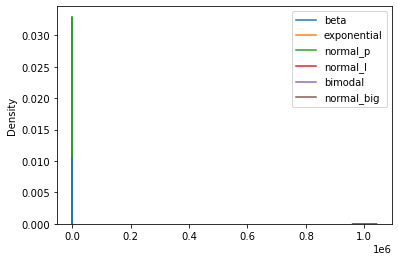

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

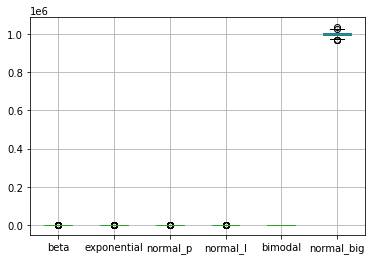

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng RobustScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.075632,-0.453417,0.088153,-0.186376,0.493875,-0.152800
1,0.617467,-0.596048,-0.563208,-1.085242,0.516165,-0.520328
2,0.548787,0.205066,-0.886720,-1.028842,0.481006,-0.570848
3,0.535554,-0.450050,-0.391379,-1.331503,0.585206,-0.125911
4,-0.175815,0.473750,0.491889,0.036582,0.404449,-1.478547


<AxesSubplot:ylabel='Density'>

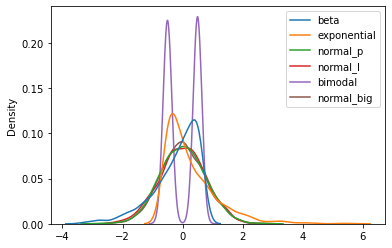

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,-2.119944e-01,2.617289e-01,2.919610e-03,-0.007678,-0.004364,0.013173
std,7.674951e-01,8.633978e-01,7.522724e-01,0.761050,0.506494,0.728263
min,-3.311052e+00,-6.097222e-01,-2.811544e+00,-2.361828,-0.725934,-2.342925
25%,-6.180803e-01,-3.668186e-01,-5.020618e-01,-0.493088,-0.504067,-0.493318
50%,-3.226586e-16,-3.737787e-17,-3.424995e-16,0.000000,0.000000,0.000000
75%,3.819197e-01,6.331814e-01,4.979382e-01,0.506912,0.495933,0.506682
max,6.750807e-01,5.593672e+00,2.776499e+00,2.593102,0.781504,2.525299


<AxesSubplot:>

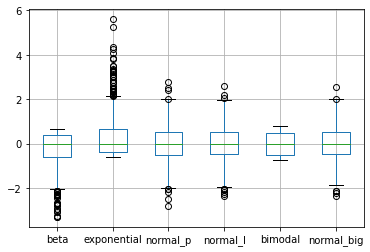

In [14]:
df_s.boxplot()

In [18]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

-3.311052421950515

In [16]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6750807143735612,
 5.593671597877699,
 2.776498506320456,
 2.5931016853773845,
 0.7815038877367525,
 2.525298936704979]

In [17]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.25622092e+01, 7.28123983e+00, 1.00199749e+01, 1.05286239e+01,
       1.59476428e-01, 9.99676747e+05])

In [27]:
mode1 = df_s['beta'].mode()
mode1[0]

-3.311052421950515